In [1]:
import stlearn as st
data = st.read.file_10x_h5("/home/d.pham/Downloads/V1_Breast_Cancer_Block_A_Section_1_filtered_feature_bc_matrix.h5")
data.var_names_make_unique()
st.add.image(adata=data, imgpath="/home/d.pham/10X/BCBA/spatial/tissue_hires_image.png")
st.add.positions(data,position_filepath = "/home/d.pham/10X/BCBA/spatial/tissue_positions_list.csv",
                scale_filepath = "/home/d.pham/10X/BCBA/spatial/scalefactors_json.json",
                quality="high")
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)




Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.uns` of view, copying.


Added tissue image to the object!
filtered out 12851 genes that are detected in less than 3 cells
normalizing counts per cell
Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


In [2]:
st.em.run_pca(data,n_comps=50)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


In [3]:
st.pp.neighbors(data,n_neighbors=15)
st.em.run_umap(data)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
UMAP is done! Generated in adata.obsm['X_umap'] nad adata.uns['umap']


In [4]:
st.pp.tiling(data,out_path="../tiling",crop_size = (20))

Tiling image: 100%|██████████ [ time left: 00:00 ]


In [5]:
st.pp.extract_feature(data)

Extract feature: 100%|██████████ [ time left: 00:00 ]


The morphology feature is added to adata.obsm['X_morphology']!


In [6]:
data

AnnData object with n_obs × n_vars = 3813 × 20687 
    obs: 'imagerow', 'imagecol', 'sum_counts', 'tile_path'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'tissue_img', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'filtered_counts', 'X_pca', 'X_umap', 'X_morphology'
    varm: 'PCs'

In [7]:
st.spatials.morphology.adjust(data,use_data="X_pca",radius=35)

Adjusting data: 100%|██████████ [ time left: 00:00 ]


The data adjusted by morphology is added to adata.obsm['X_pca_morphology']


In [18]:
#st.spatial.smooth.disk(data,rates=2,method="median",use_data="X_umap")
st.pp.neighbors(data,n_neighbors=50,use_rep='X_pca_morphology')
st.tl.clustering.louvain(data)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


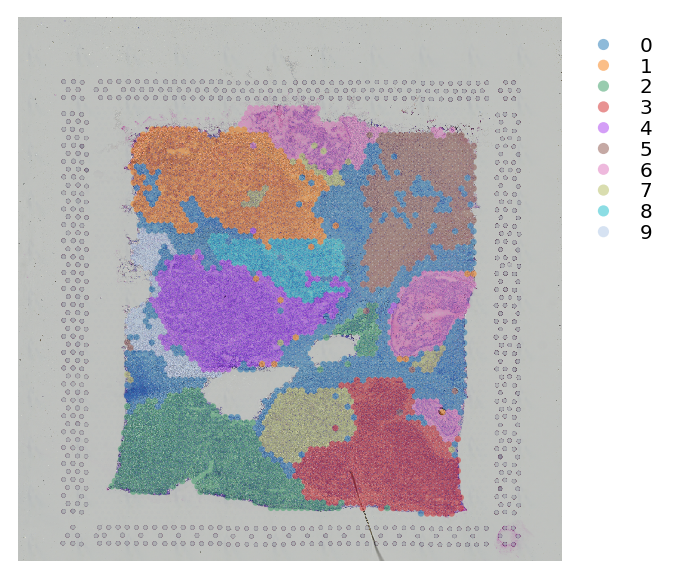

In [19]:
st.pl.cluster_plot(data,use_label="louvain",data_alpha=0.5)

In [20]:
#st.spatial.smooth.disk(data,rates=2,method="median",use_data="X_umap")
st.pp.neighbors(data,n_neighbors=50,use_rep='X_pca')
st.tl.clustering.louvain(data,key_added="louvain2")

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 
Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


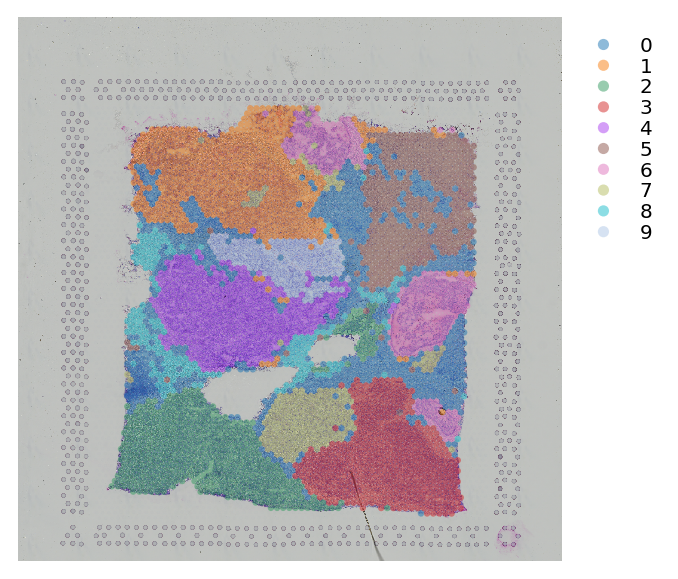

In [21]:
st.pl.cluster_plot(data,use_label="louvain2",data_alpha=0.5)